In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import datetime
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [37]:
class Student_Performance:

    def __init__(self):
        pass

    def Data_Clean(self,df):

        df.drop_duplicates(inplace=True)

        df.columns = [i.lower() for i in df.columns]

        for i in df.columns:
            if df[i].dtype == 'object':
                df[i] = df[i].str.lower()
        
        df.attendance_rate = df.attendance_rate.astype('int64')

        return df

In [38]:
df = pd.read_csv('student_perform.csv')
stu = Student_Performance()
df = stu.Data_Clean(df)
df

,student_id,gender,study_hours_per_week,attendance_rate,past_exam_scores,parental_education_level,internet_access_at_home,extracurricular_activities,final_exam_score,pass_fail
0,s147,male,31,68,86,high school,yes,yes,63,pass
1,s136,male,16,78,73,phd,no,no,50,fail
2,s209,female,21,87,74,phd,yes,no,55,fail
3,s458,female,27,92,99,bachelors,no,no,65,pass
4,s078,female,37,98,63,masters,no,yes,70,pass
...,...,...,...,...,...,...,...,...,...,...
701,s118,female,21,69,90,masters,yes,no,50,fail
702,s358,female,22,93,76,bachelors,no,no,60,pass
703,s492,male,14,84,78,phd,yes,no,50,fail
705,s473,male,25,98,75,bachelors,yes,no,57,fail


In [39]:
Num_column = df.select_dtypes(include=['int32','int64','float']).columns
Cat_column = df.select_dtypes(include=['object']).columns

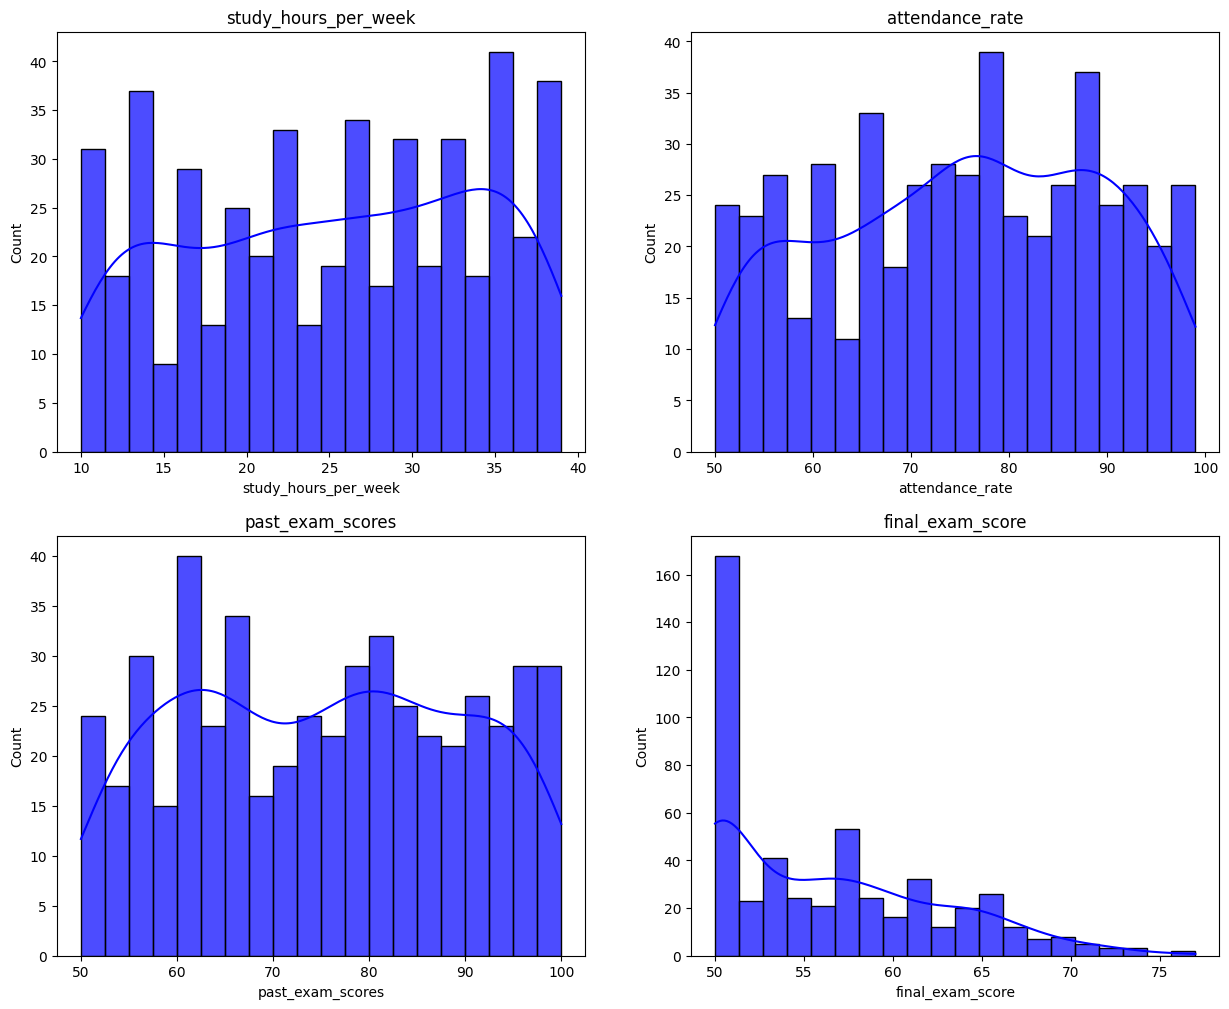

In [40]:
n_cols = 2
n_rows = (len(Num_column) + 1) // n_cols  # Round up number of rows

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))
ax = ax.flatten()  # Flatten in case of multiple rows
for i, col in enumerate(Num_column):
    sns.histplot(x=col, data=df, ax=ax[i],bins=20, kde=True, color="blue", alpha=0.7)
    ax[i].set_title(col)
    

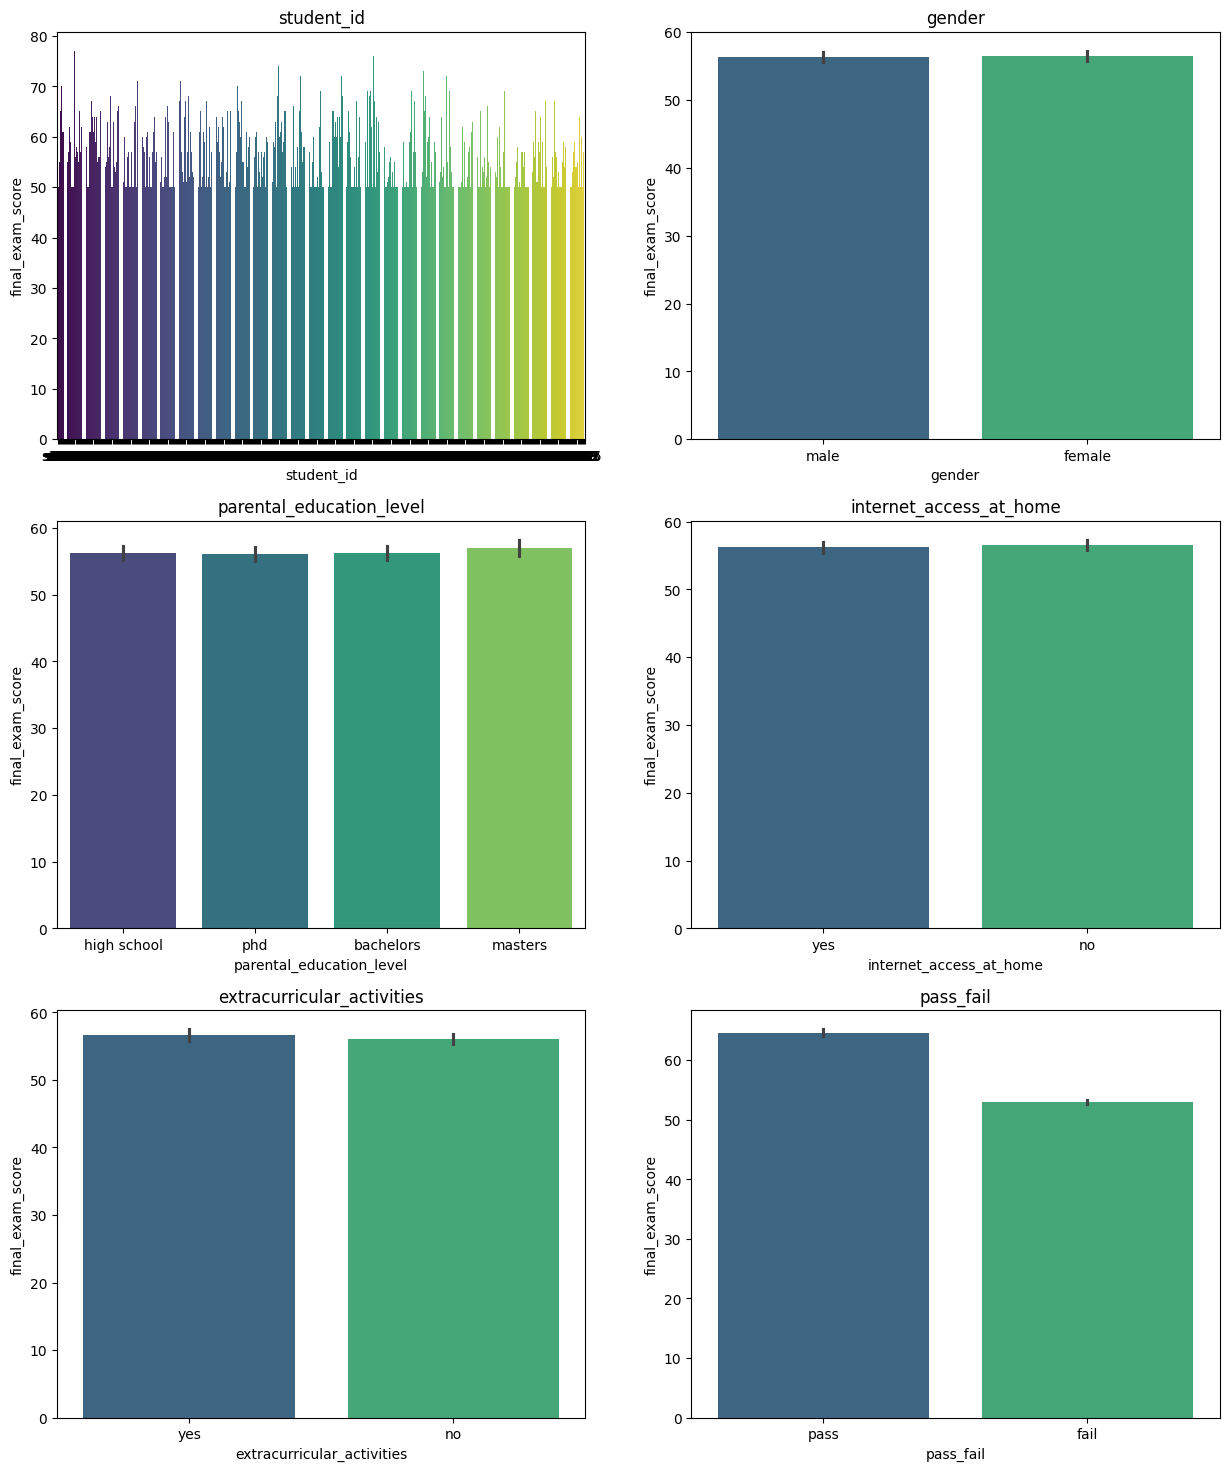

In [41]:
n_cols = 2
n_rows = (len(Cat_column) + 1) // n_cols  # Round up number of rows

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))
ax = ax.flatten()  # Flatten in case of multiple rows
for i, col in enumerate(Cat_column):
    sns.barplot(x=col,y='final_exam_score' ,data=df, ax=ax[i],palette='viridis')
    ax[i].set_title(col)
    

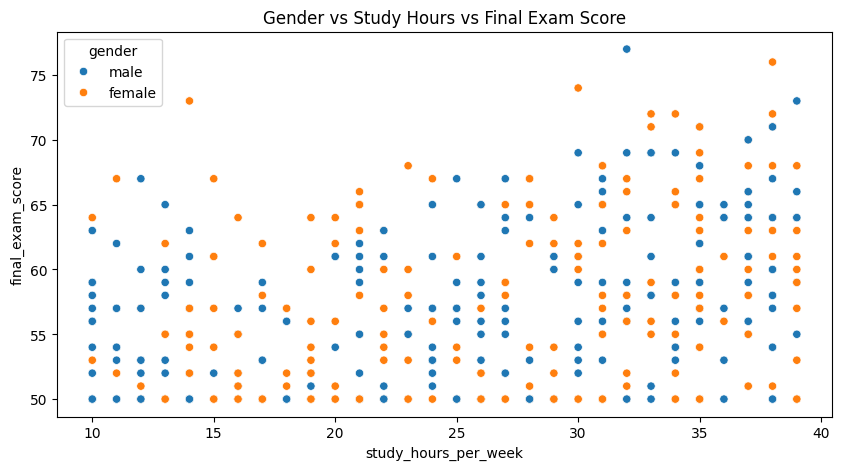

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(df,x='study_hours_per_week',y='final_exam_score',hue='gender')
plt.title('Gender vs Study Hours vs Final Exam Score')
plt.show()

In [43]:
pa_fa_df = pd.DataFrame(df.groupby(['gender','pass_fail'])['student_id'].count().reset_index())
pa_fa_df.columns = ['gender','pass_fail','count']
pa_fa_df

,gender,pass_fail,count
0,female,fail,176
1,female,pass,80
2,male,fail,178
3,male,pass,66


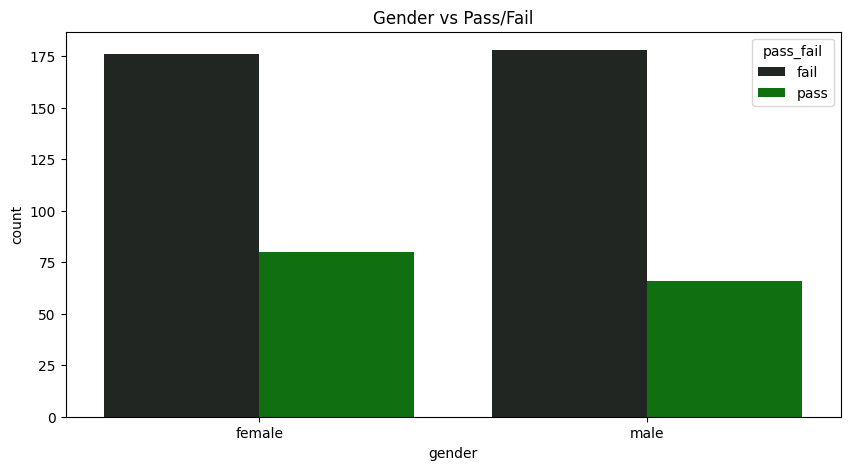

In [44]:
plt.figure(figsize=(10, 5))
sns.barplot(x='gender',y='count', data= pa_fa_df,hue=('pass_fail'),color='green')
plt.title('Gender vs Pass/Fail')
plt.show()

In [45]:
att_df = pd.DataFrame(df.groupby(['gender','pass_fail'])['attendance_rate'].mean().reset_index())
att_df

,gender,pass_fail,attendance_rate
0,female,fail,71.630682
1,female,pass,83.025000
2,male,fail,72.623596
3,male,pass,83.090909


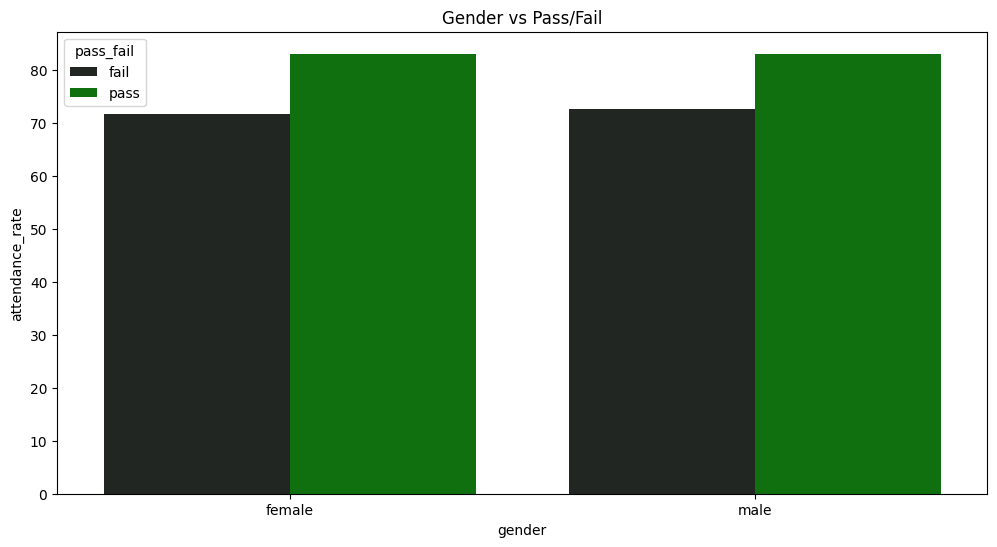

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(x='gender',y='attendance_rate', data= att_df,hue=('pass_fail'),color='green')
plt.title('Gender vs Pass/Fail')
plt.show()

<Axes: xlabel='parental_education_level'>

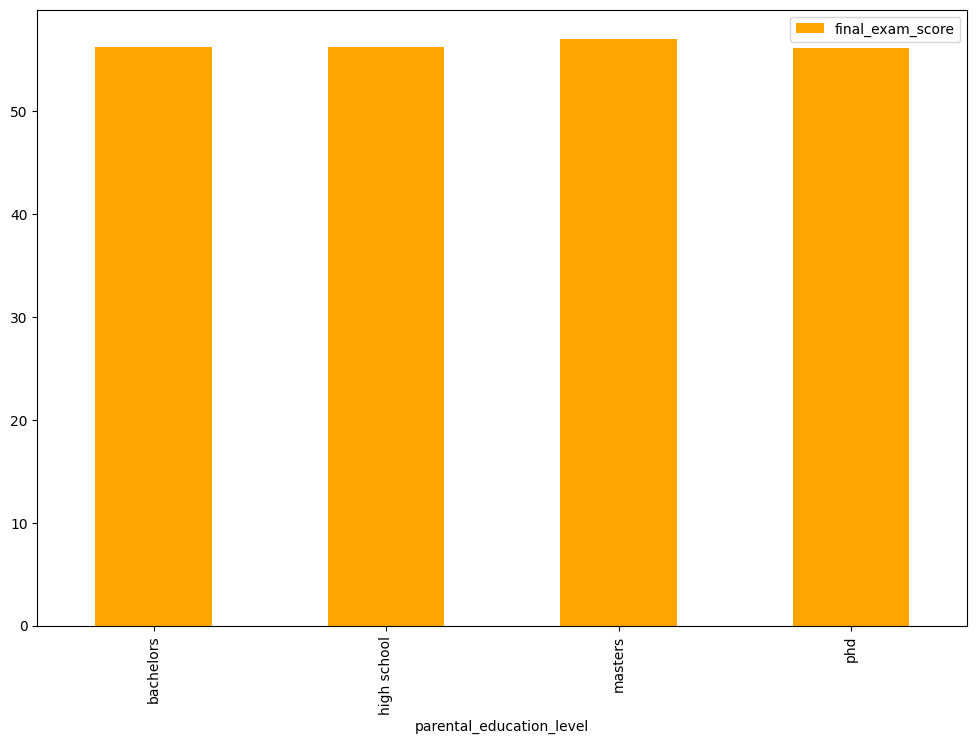

In [47]:
df.pivot_table(index='parental_education_level',values='final_exam_score', aggfunc='mean').plot(kind = 'bar', figsize = (12,8), color = 'orange')

<Axes: xlabel='gender'>

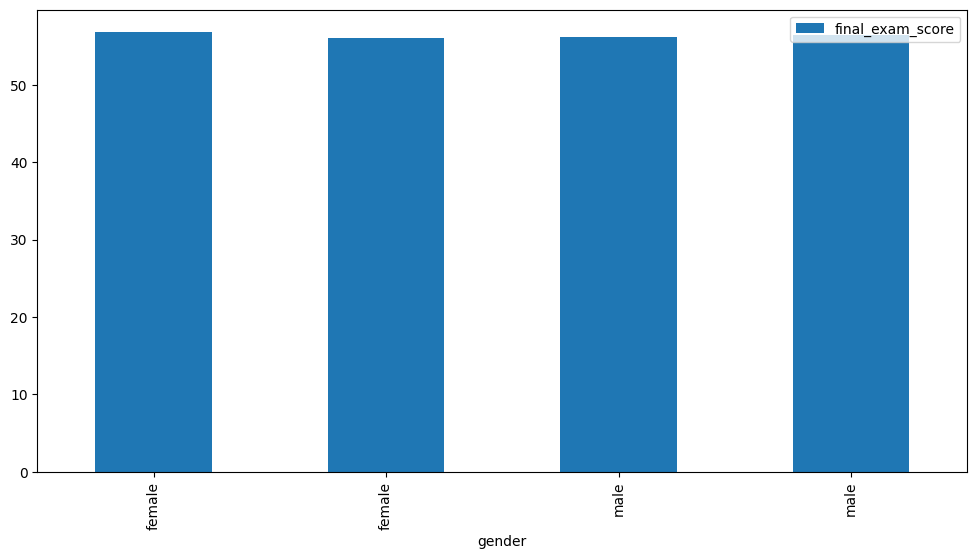

In [48]:
df.groupby(['gender','internet_access_at_home'])['final_exam_score'].mean().reset_index().plot(kind='bar',x='gender',y='final_exam_score',figsize=(12,6))

<Axes: xlabel='gender'>

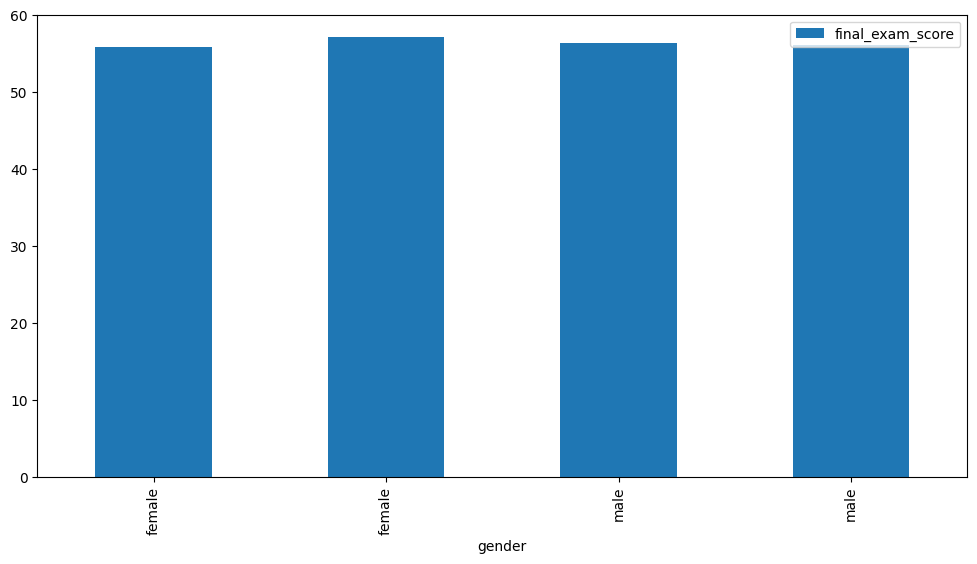

In [49]:
df.groupby(['gender','extracurricular_activities'])['final_exam_score'].mean().reset_index().plot(kind='bar',x='gender',y='final_exam_score',figsize=(12,6))

### Chossing the columns to analyze

In [50]:
for i in Num_column:

    from scipy.stats import ttest_1samp
    import numpy as np

    # Sample data (kg lost by each participant)
    data = df[i]

    # One-sample t-test: is mean < 5?
    t_stat, p_value = ttest_1samp(data, popmean=5)

    # Since it's a one-tailed test (less than), divide p-value by 2
    p_value_one_tailed = p_value / 2

    print(f"Colum Name : {i}")
    print(20*"_")

    print(f"t-statistic: {t_stat:.3f}")
    print(f"p-value (one-tailed): {p_value_one_tailed:.4f}")

    # Interpretation
    
    alpha = 0.05
    if t_stat < 0 and p_value_one_tailed < alpha:
        print("Reject the null hypothesis: Mean < 5 kg")
    else:
        print("Fail to reject the null hypothesis")
    
    print(20*"*")

Colum Name : study_hours_per_week
____________________
t-statistic: 51.262
p-value (one-tailed): 0.0000
Fail to reject the null hypothesis
********************
Colum Name : attendance_rate
____________________
t-statistic: 112.752
p-value (one-tailed): 0.0000
Fail to reject the null hypothesis
********************
Colum Name : past_exam_scores
____________________
t-statistic: 108.713
p-value (one-tailed): 0.0000
Fail to reject the null hypothesis
********************
Colum Name : final_exam_score
____________________
t-statistic: 183.330
p-value (one-tailed): 0.0000
Fail to reject the null hypothesis
********************


In [51]:
from scipy.stats import ttest_ind

# Class A and B scores
class_a = df[df['gender'] == 'male']['final_exam_score']
class_b = df[df['gender'] == 'female']['final_exam_score']

# Perform two-sample t-test (assume equal variances)
t_stat, p_val = ttest_ind(class_a, class_b)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.6f}")

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: The class averages are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

t-statistic: -0.4027
p-value: 0.687317
Fail to reject the null hypothesis: No significant difference.


In [52]:
from scipy.stats import ttest_ind

# Class A and B scores
class_a = df[df['internet_access_at_home'] == 'yes']['final_exam_score']
class_b = df[df['internet_access_at_home'] == 'no']['final_exam_score']

# Perform two-sample t-test (assume equal variances)
t_stat, p_val = ttest_ind(class_a, class_b)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.6f}")

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: The class averages are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

t-statistic: -0.4797
p-value: 0.631685
Fail to reject the null hypothesis: No significant difference.


In [53]:
from scipy.stats import ttest_ind

# Class A and B scores
class_a = df[df['extracurricular_activities'] == 'yes']['final_exam_score'].values
class_b = df[df['extracurricular_activities'] == 'no']['final_exam_score'].values

# Perform two-sample t-test (assume equal variances)
t_stat, p_val = ttest_ind(class_a, class_b)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.6f}")

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: The class averages are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

t-statistic: 0.9917
p-value: 0.321808
Fail to reject the null hypothesis: No significant difference.


In [54]:
from scipy.stats import f_oneway

# Test scores from 3 different classes
class_a = df[df['parental_education_level'] == 'high school'].final_exam_score.values
class_b = df[df['parental_education_level'] == 'bachelors'].final_exam_score.values
class_c = df[df['parental_education_level'] == 'phd'].final_exam_score.values
class_d = df[df['parental_education_level'] == 'masters'].final_exam_score.values

# Perform one-way ANOVA
f_stat, p_val = f_oneway(class_a, class_b, class_c,class_d)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret result
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

F-statistic: 0.5099
p-value: 0.6756
Fail to reject the null hypothesis: No significant difference.


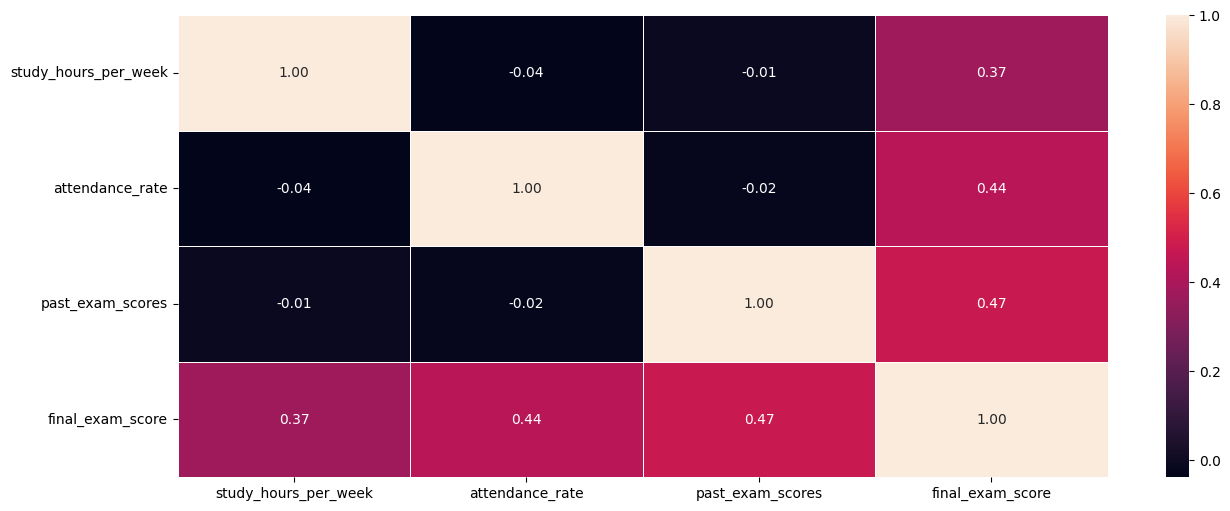

In [55]:
plt.figure(figsize=(15,6))
sns.heatmap(df[Num_column].corr(),annot=True,fmt='.2f',linewidths=0.5)
plt.show()

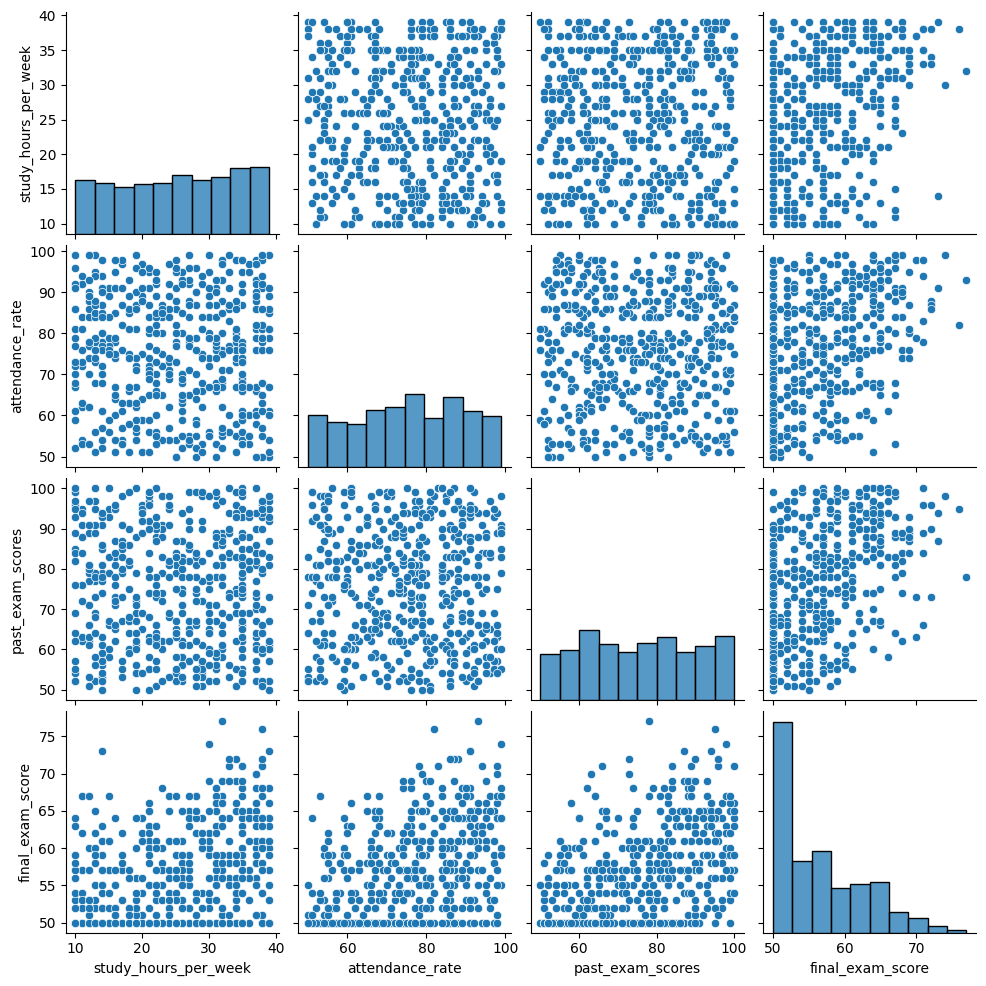

In [56]:
sns.pairplot(df[Num_column])
plt.show()

# There are No significant difference between columns